In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to project foler
path = r"D:\Data Immersion - CareerFoundry\Python Fundamentals for Data Analysts\Instacart Basket Analysis"

In [3]:
# Import fully merged dataframe
ords_prods_custs_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merge.pkl'))

In [5]:
ords_prods_custs_merge.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,order_number,...,busiest_period_of_day,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,28,...,Most orders,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,30,...,Most orders,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,1960,3160996,138,1,...,Most orders,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,1969,2254091,138,10,...,Most orders,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,1968,505689,138,9,...,Most orders,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [8]:
ords_prods_custs_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   product_id              int64   
 2   product_name            object  
 3   aisle_id                int64   
 4   department_id           int64   
 5   prices                  float64 
 6   Unnamed: 0_y            int64   
 7   order_id                int64   
 8   user_id                 int64   
 9   order_number            int64   
 10  orders_day_of_the_week  int64   
 11  order_hour_of_day       int64   
 12  days_since_prior_order  float64 
 13  add_to_cart_order       int64   
 14  reordered               int64   
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

# Customer profiling

## In this notebook you will find.....

### Security implications of the new data

### Customer behaviour over the regions of the U.S.

### Sampling out low-activity customers

### Visualization of distribustion of profiles

### Analysis of customers customer profiles in terms of regions and departments

#### 2) Security implications of of new data

Within the new customer dataset we have the names, age, income, family status of customers along with the state that they live in. In the best case scenario I would consult a senior analyst but since that is not available to me right now, what I can do is make sure that the information in this data set is sent only to the stakeholders at Instacart and not share the information with anyone else expcept the ones working on the project with me.

#### 3) Customer behaviour over the reions of the U.S

In [7]:
# Label the region each customer
result = []

for value in ords_prods_custs_merge['state']:
    if (value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana' or value ==  'West Virginia'):
        result.append('South')
    elif (value =='Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada'or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii'):
        result.append('West')
    else:
        result.append('Not Enough Data')

In [5]:
# Check the result
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [8]:
# Transfer the for-loop results into a region column in the main dataframe
ords_prods_custs_merge['region'] = result

In [9]:
ords_prods_custs_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# Count the number of spenders in each region
ords_prods_custs_merge.value_counts(['region','spending_flag'])

region     spending_flag
South      Low spender      10582275
West       Low spender       8132585
Midwest    Low spender       7441350
Northeast  Low spender       5614536
South      High spender       209610
West       High spender       160328
Midwest    High spender       155975
Northeast  High spender       108200
dtype: int64

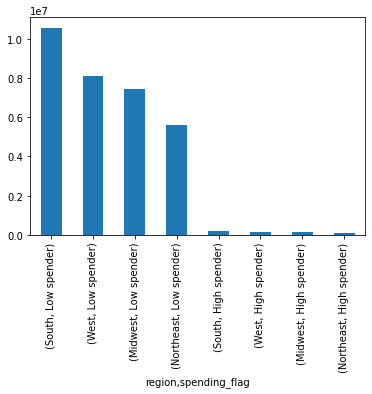

In [18]:
# Create bar chart of the spenders per region
bar_1 = ords_prods_custs_merge.value_counts(['region','spending_flag']).plot.bar()

In [19]:
# Export bar chart
bar_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region.png'))

In [10]:
# Export the dataframe with the regions
ords_prods_custs_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merge.pkl'))

#### 4)

In [6]:
# Create exclusion flag for low-spenders
ords_prods_custs_merge.loc[ords_prods_custs_merge['max_order'] < 5, 'activity_flag'] = 'Low activity'
ords_prods_custs_merge.loc[ords_prods_custs_merge['max_order'] >= 5, 'activity_flag'] = 'Active customer'

In [24]:
ords_prods_custs_merge['activity_flag'].value_counts()

Active customer    30964564
Low activity        1440295
Name: activity_flag, dtype: int64

In [7]:
# Create subset of data wihtout low-active customers
df_1 = ords_prods_custs_merge[ords_prods_custs_merge.activity_flag == 'Active customer']

In [43]:
# Check dataframe
df_1.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,order_number,...,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,activity_flag,Activity_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,28,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Active customer,Active customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,30,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Active customer,Active customer
2,907,907,Premium Sliced Bacon,106,12,20.0,1960,3160996,138,1,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Active customer,Active customer
3,907,907,Premium Sliced Bacon,106,12,20.0,1969,2254091,138,10,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Active customer,Active customer
4,1000,1000,Apricots,18,10,12.9,1968,505689,138,9,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Active customer,Active customer


In [8]:
# Export dataframe
df_1.to_pickle(os.path.join(path,'02 Data','Prepared Data','active_customers.pkl'))

### 5) Create customer profiles based on age, income, certain goods in departments and number of dependents

#### Age profile

In [3]:
# Import a seperate dataframe to hold our profiles
df_profiles = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merge.pkl'))

In [4]:
# Create age flag column
df_profiles.loc[(df_profiles['age'] >= 18) & (df_profiles['age'] < 30), 'age_profile'] = 'Young person'
df_profiles.loc[(df_profiles['age'] >= 30) & (df_profiles['age'] < 50), 'age_profile'] = 'Middle aged'
df_profiles.loc[(df_profiles['age'] >= 50) & (df_profiles['age'] < 65), 'age_profile'] = 'Older person'
df_profiles.loc[(df_profiles['age'] >= 65) & (df_profiles['age'] <= 81), 'age_profile'] = 'Senior'

In [18]:
df_profiles['age_profile'].value_counts(dropna = False)

Middle aged     10182988
Senior           8575084
Older person     7556346
Young person     6090441
Name: age_profile, dtype: int64

#### Income profile

In [5]:
# Create income flag column
df_profiles.loc[(df_profiles['income'] >= 25000) & (df_profiles['income'] < 41000), 'income_flag'] = 'Low income'
df_profiles.loc[(df_profiles['income'] >= 41000) & (df_profiles['income'] < 130000), 'income_flag'] = 'Middle income'
df_profiles.loc[df_profiles['income'] >= 130000, 'income_flag'] = 'High income'

In [27]:
print(df_profiles['income_flag'].value_counts(dropna = False))

Middle income    22811499
High income       7713528
Low income        1879832
Name: income_flag, dtype: int64


#### Department profile

In [5]:
# Create department flag column
department_flag = []

for value in df_profiles['department_id']:
    if (value == 5 or value == 19 or value == 20):
        department_flag.append('Party host')
    elif (value == 3 or value == 9 or value == 16):
        department_flag.append('Baker')
    elif (value == 18 or value == 10): 
        department_flag.append('Family')
    else:
        department_flag.append('Other')

In [6]:
df_profiles['product_flag'] = department_flag

In [33]:
df_profiles['product_flag'].value_counts(dropna = False)

Other         20416187
Baker          7437802
Party host     4092495
Family          458375
Name: product_flag, dtype: int64

#### Dependant flag

In [7]:
# Create a family flag based on number of dependants
df_profiles.loc[df_profiles['number_of_dependants'] == 0, 'family_flag'] = 'Single'
df_profiles.loc[(df_profiles['number_of_dependants'] >=1) & (df_profiles['number_of_dependants'] <=2), 'family_flag'] = 'Small family'
df_profiles.loc[df_profiles['number_of_dependants'] == 3, 'family_flag'] = 'Big family'

In [48]:
df_profiles['family_flag'].value_counts(dropna = False)

Small family    16172247
Big family       8135109
Single           8097503
Name: family_flag, dtype: int64

In [9]:
# Export dataframe
df_profiles.to_pickle(os.path.join(path, '02 Data','Prepared Data','customer_profiles.pkl'))

#### 6) Create visualizations based to show distribution of profiles

In [5]:
# Import profiles dataframe
df_profiles = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_profiles.pkl'))

In [4]:
df_profiles.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,order_number,...,age,date_joined,number_of_dependants,fam_status,income,region,age_profile,income_flag,family_flag,product_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,28,...,81,8/1/2019,1,married,49620,Midwest,Senior,Middle income,Small family,Party host
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,30,...,81,8/1/2019,1,married,49620,Midwest,Senior,Middle income,Small family,Party host
2,907,907,Premium Sliced Bacon,106,12,20.0,1960,3160996,138,1,...,81,8/1/2019,1,married,49620,Midwest,Senior,Middle income,Small family,Other
3,907,907,Premium Sliced Bacon,106,12,20.0,1969,2254091,138,10,...,81,8/1/2019,1,married,49620,Midwest,Senior,Middle income,Small family,Other
4,1000,1000,Apricots,18,10,12.9,1968,505689,138,9,...,81,8/1/2019,1,married,49620,Midwest,Senior,Middle income,Small family,Family


In [ ]:
# 
df_profiles['age_profile'].value_counts(dropna = False)

In [ ]:
print(df_profiles['income_flag'].value_counts(dropna = False))

In [ ]:
df_profiles['product_flag'].value_counts(dropna = False)

In [ ]:
df_profiles['family_flag'].value_counts(dropna = False)

#### 7) Aggregate the max, mean and min variables for usage and expenditure

In [ ]:
df_ords_prods_merge.groupby(['region']).agg({'order_id'})

In [8]:
# Get basic stats of sales for the age flag
df_profiles.groupby(['age_profile']).agg({'order_number':['mean','min','max']})

order_number        
                     mean min max
age_profile                      
Middle aged     17.197810   1  99
Older person    17.145663   1  99
Senior          17.098243   1  99
Young person    17.107372   1  99

In [12]:
# Recieve basic stats of sales for various income classes of customers
df_profiles.groupby(['income_flag']).agg({'order_number':['mean','min','max']})

order_number        
                      mean min max
income_flag                       
High income      17.330890   1  99
Low income       15.653961   1  99
Middle income    17.201186   1  99

In [17]:
# Receive basic stats of sales for the department flag
df_profiles.groupby(['product_flag']).agg({'order_number':['mean','min','max']})

order_number        
                     mean min max
product_flag                     
Baker           17.381296   1  99
Family          19.377281   1  99
Other           17.049047   1  99
Party host      16.922863   1  99

In [4]:
# Receive basic stats of sales based on number of dependents
df_profiles.groupby(['family_flag']).agg({'order_number':['mean','min','max']})

order_number        
                     mean min max
family_flag                      
Big family      17.143361   1  99
Single          17.264622   1  99
Small family    17.080529   1  99

#### 8) Compare customer profiles with regions and departments

In [7]:
# Compare the age column and region column
age_region = pd.crosstab(df_profiles['age_profile'], df_profiles['region'], dropna = False))

region        Midwest  Northeast    South     West
age_profile                                       
Middle aged   2407486    1789125  3400114  2586263
Older person  1778290    1309271  2502881  1965904
Senior        1990844    1553903  2836257  2194080
Young person  1420705    1070437  2052633  1546666


In [9]:
# Compare the age column with the departments column
print(pd.crosstab(df_profiles['department_id'], df_profiles['age_profile'], dropna = False))

age_profile    Middle aged  Older person   Senior  Young person
department_id                                                  
1                   697145        524416   593669        419513
2                    11136          8567     9425          7163
3                   368396        274153   309522        220357
4                  2986704       2203926  2513763       1774898
5                    49091         35798    39036         29771
6                    84943         62209    70774         51327
7                   839782        633966   714832        499543
8                    29603         22712    26286         19115
9                   269965        203300   228935        164427
10                   10977          7748     9242          6606
11                  140741        105705   117405         83721
12                  221223        164692   190114        132898
13                  588426        438154   496979        351810
14                  220128        164767

There is not a connection between the deparments and regions within the age demographic. The distribution of orders in the departments and customers in the regions are roughly similar.

In [10]:
# Compare income_flag with the region column
print(pd.crosstab(df_profiles['income_flag'], df_profiles['region'], dropna = False))

region         Midwest  Northeast    South     West
income_flag                                        
High income    1835777    1367168  2546153  1964430
Low income      436004     333364   645264   465200
Middle income  5325544    4022204  7600468  5863283


In [12]:
# Compare the income_flag with the department column
print(pd.crosstab(df_profiles['department_id'], df_profiles['income_flag'], dropna = False))

income_flag    High income  Low income  Middle income
department_id                                        
1                   541965      122040        1570738
2                     8756        2306          25229
3                   288754       58296         825378
4                  2274108      444320        6760863
5                    41241       10406         102049
6                    65556       11823         191874
7                   613891      220136        1854096
8                    25215        5282          67219
9                   213044       35185         618398
10                    7552        2557          24464
11                  107073       27137         313362
12                  182871       15241         510815
13                  457915       90562        1326892
14                  162424       53003         487606
15                  266525       42373         759160
16                 1307701      273862        3817184
17                  178307  

No connection since the distribution is the same between the regions and departments. Except, we see that in the  low income customers buy a lot of products from department 19, compared to the other economic classes

In [13]:
# Comapre the product_flag with the region column
print(pd.crosstab(df_profiles['product_flag'], df_profiles['region'], dropna = False))

region        Midwest  Northeast    South     West
product_flag                                      
Baker         1741861    1314441  2473228  1908272
Family         107176      80941   155187   115071
Other         4792709    3599320  6805081  5219077
Party host     955579     728034  1358389  1050493


In [14]:
# Compare the product_flag with the departments column
print(pd.crosstab(df_profiles['department_id'], df_profiles['product_id'], dropna = False))

product_id     1      2      3      4      5      6      7      8      9      \
department_id                                                                  
1                  0      0      0    329      0      0      0    165      0   
2                  0      0      0      0      0      0      0      0      0   
3                  0      0      0      0      0      0      0      0      0   
4                  0      0      0      0      0      0      0      0      0   
5                  0      0      0      0      0      0      0      0      0   
6                  0      0      0      0      0      0      0      0      0   
7                  0      0    277      0      0      0     30      0      0   
8                  0      0      0      0      0      0      0      0      0   
9                  0      0      0      0      0      0      0      0      0   
10                 0      0      0      0      0      0      0      0      0   
11                 0      0      0      

We can ignore the product flag and department_id since their the same columns. 

In [15]:
# Compare the family_flag with the region column
print(pd.crosstab(df_profiles['family_flag'], df_profiles['region'], dropna = False))

region        Midwest  Northeast    South     West
family_flag                                       
Big family    1874667    1445080  2706538  2108824
Single        1905200    1418301  2701659  2072343
Small family  3817458    2859355  5383688  4111746


In [16]:
# Compare the family_flag with the departments column
print(pd.crosstab(df_profiles['department_id'], df_profiles['family_flag'], dropna = False))

family_flag    Big family   Single  Small family
department_id                                   
1                  561027   557160       1116556
2                    8860     9175         18256
3                  292859   294405        585164
4                 2387866  2375445       4715980
5                   39736    39118         74842
6                   66848    67713        134692
7                  670063   674442       1343618
8                   24349    24583         48784
9                  219726   215262        431639
10                   8685     8278         17610
11                 112185   112006        223381
12                 180192   174084        354651
13                 469604   466757        939008
14                 175466   174577        352990
15                 269614   264838        533606
16                1351908  1349362       2697477
17                 186241   180773        371652
18                 106094   106494        211214
19                 7

As we can see, there is no connection due to the distribution being similar between the different demographics

#### 9) Make visualizations of your results and export them

In [9]:
# Make bar chart of the age demographics by region
age_region_demo = pd.crosstab(df_profiles['region'], df_profiles['age_profile'], dropna = False)

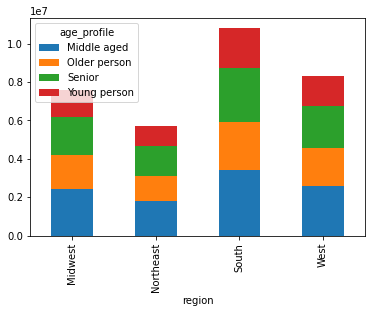

In [11]:
bar_age_region = age_region_demo.plot.bar(stacked = True)

In [14]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

In [26]:
# Make and export bar chart of age demographic by department
age_dept = pd.crosstab(df_profiles['department_id'], df_profiles['age_profile'], dropna = False)

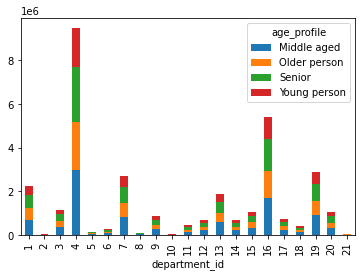

In [24]:
bar_age_dept = age_dept.plot.bar(stacked = True)

In [25]:
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_age_dept.png'))

In [29]:
# Make and export bar chart of income demographic based on region
income_region = pd.crosstab(df_profiles['region'], df_profiles['income_flag'], dropna = False)

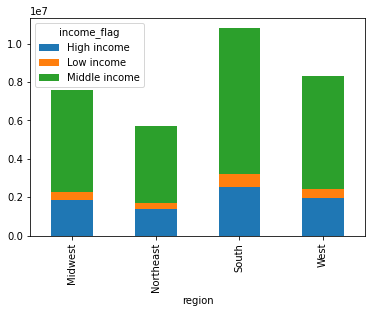

In [31]:
bar_income_region = income_region.plot.bar(stacked = True)

In [32]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))

In [33]:
# Make and export bar chart of income demographic based on department
income_dept = pd.crosstab(df_profiles['department_id'], df_profiles['income_flag'], dropna = False)

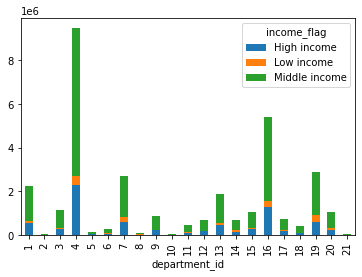

In [34]:
bar_income_dept = income_dept.plot.bar(stacked = True)

In [35]:
bar_income_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_dept.png'))

In [7]:
# Make and export bar chart of products by region
prods_region = pd.crosstab(df_profiles['region'], df_profiles['product_flag'], dropna = False)

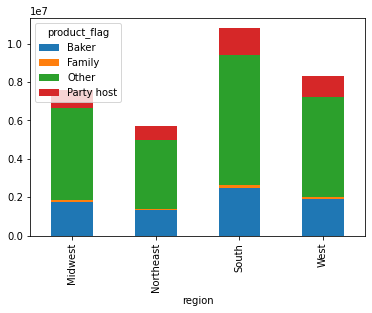

In [8]:
bar_prods_region = prods_region.plot.bar(stacked = True)

In [9]:
bar_prods_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_prods_region.png'))

I am not going to make a bar chart of the products and departments since they are basically the same variable

In [43]:
# Make and export bar chart of family demographic based on regions
fam_region = pd.crosstab(df_profiles['region'], df_profiles['family_flag'], dropna = False)

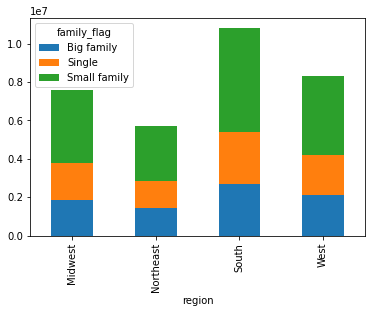

In [44]:
bar_fam_region = fam_region.plot.bar(stacked = True)

In [45]:
bar_fam_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_fam_region.png'))

In [48]:
# Make and export bar chart of family demographic based on department
fam_dept = pd.crosstab(df_profiles['department_id'], df_profiles['family_flag'], dropna = False)

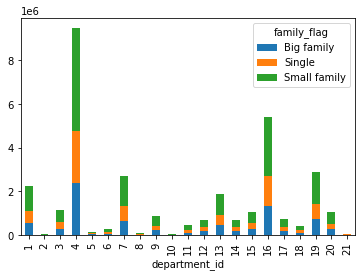

In [49]:
bar_fam_dept = fam_dept.plot.bar(stacked = True)

In [50]:
bar_fam_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_fam_department.png'))